In [ ]:
새로운 차를 팔려고 하는 자동차 판매점 


몇 가지 광고의 클릭률을 최적화

10가지 광고 준비하여 어떤 광고가 가장 효과적일지 선택 곧 잠재적인 고객으로 만들기

릭 1 아니면 0

In [ ]:
UCB와 톰슨 샘플링은 둘 다 멀티 암드 밴딧 문제를 해결한다.

결정론적 알고리즘. 무작위성이 머신에 달려있어서 더 많이 수정 가능
매 라운드 마다 결과 값을 통합하는 업데이트 요구로 인한 많은 비용 발생.

확률적 알고리즘. 머신에서 이전의 값을 받고난 후 재실행하면 모두 달라진다. 
바로 알 수 없다. 설정한 라운드 뒤에 알 수 있음 
UCB보다 더 잘 작동된다.

In [3]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
import math
N = 10000 # 인원 수
d = 10 # 광고 수
ads_selected = [] # 광고 목록
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

# 결과

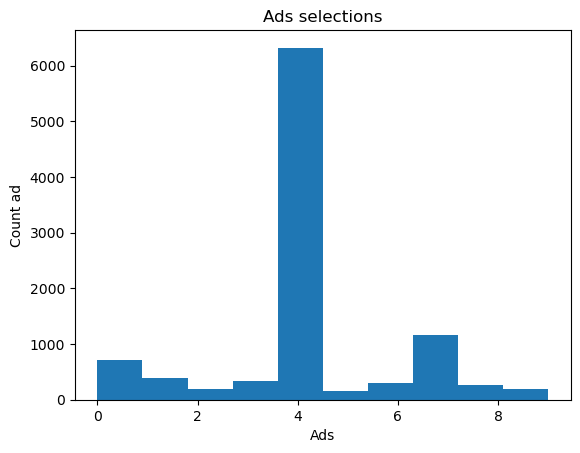

In [6]:
plt.hist(ads_selected)
plt.title('Ads selections')
plt.xlabel('Ads')
plt.ylabel('Count ad')
plt.show()

인덱스 4, 즉 광고 5번이 가장 클릭이 많았다.

In [7]:
N = 500 # 인원 수
d = 10 # 광고 수
ads_selected = [] # 광고 목록
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

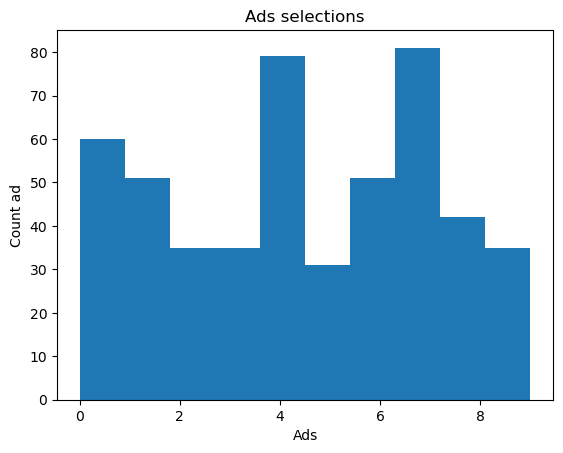

In [8]:
plt.hist(ads_selected)
plt.title('Ads selections')
plt.xlabel('Ads')
plt.ylabel('Count ad')
plt.show()

500 라운드 수준으로 떨어져야 최적의 광고를 분류하기 어려워졌다.

톰슨 샘플링에서는 어떨지 비교해보자.